In [2]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vytau\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.Successfully installed greenlet-1.1.2 sqlalchemy-1.4.31



You should consider upgrading via the 'C:\Users\vytau\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import mysql.connector
import json

with open("credentials.json", 'r') as fr:
    credentials = json.load(fr)

mydb = mysql.connector.connect(
    host="127.0.0.1", # IP address
    port="3306",
    user=credentials['user'],
    password=credentials['pass'],
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [11]:
df = pd.read_csv('wine_cleaned.csv', index_col = 0) # relative path
df.head()


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,naujas_stulpelis,description_len,place
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,24,Italy Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,28,US Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,33,US Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,56.55,41,US Oregon


In [12]:
df = df.rename( columns={'taster_name': 'Taster', 'taster_twitter_handle': 'twitter_acc'	 } )
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,Taster,twitter_acc,title,variety,winery,naujas_stulpelis,description_len,place
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,24,Italy Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,38,Portugal Douro


In [ ]:
df.rename( index= {1: 'first', 2: 'second'} )


## dtypes

In [17]:
df['points'].dtype

dtype('int64')

In [19]:
print(df['description'].dtype)

object


In [20]:
df['price'].dtype

dtype('float64')

In [22]:
df['points'].astype('float64')
df['points'] = df['points'].astype('float64')

In [23]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,Taster,twitter_acc,title,variety,winery,naujas_stulpelis,description_len,place
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,24,Italy Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,38,Portugal Douro


In [25]:
df [df['region_2'].isna()]

,country,description,designation,points,price,province,region_1,region_2,Taster,twitter_acc,title,variety,winery,naujas_stulpelis,description_len,place
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,24,Italy Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,38,Portugal Douro
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,33,US Michigan
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,42,Spain Northern Spain
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,13.92,31,Italy Sicily & Sardinia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90.0,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,25.20,32,France Alsace
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90.0,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),25.20,34,Germany Mosel
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90.0,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,27.00,43,France Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90.0,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,28.80,40,France Alsace


In [26]:
df['region_2'].fillna('Not specified')

0             Not specified
1             Not specified
2         Willamette Valley
3             Not specified
4         Willamette Valley
                ...        
129966        Not specified
129967         Oregon Other
129968        Not specified
129969        Not specified
129970        Not specified
Name: region_2, Length: 119988, dtype: object

In [28]:
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,Taster,twitter_acc,title,variety,winery,naujas_stulpelis,description_len,place
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,24,Italy Sicily & Sardinia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,28,US Oregon


In [51]:
df['twitter_acc'].replace('@paulgwine ', '@me').head(50)

0      @kerinokeefe
1        @vossroger
2       @paulgwine 
3               NaN
4       @paulgwine 
5       @wineschach
6      @kerinokeefe
7        @vossroger
8               NaN
9        @vossroger
10          @vboone
11       @vossroger
12          @vboone
13     @kerinokeefe
14    @mattkettmann
15              NaN
16      @wineschach
17      @wineschach
18      @wineschach
19              NaN
20              NaN
21      @paulgwine 
22     @kerinokeefe
23    @mattkettmann
24     @kerinokeefe
25          @vboone
26     @kerinokeefe
27     @kerinokeefe
28     @kerinokeefe
29          @vboone
30       @vossroger
31              NaN
32              NaN
33              NaN
34              NaN
35      @paulgwine 
36      @wineschach
37              NaN
38              NaN
39              NaN
40              NaN
41      @paulgwine 
42       @vossroger
43              NaN
44      @wineschach
45              NaN
46              NaN
47              NaN
48              NaN
49       @vossroger


In [42]:
print(str(df['twitter_acc'].loc[[2]]))

2    @paulgwine 
Name: twitter_acc, dtype: object


In [53]:
ca_videos = pd.read_csv('CAvideos.csv')
ca_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [54]:
gb_videos = pd.read_csv('GBvideos.csv')
gb_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


## Concat

In [56]:
pd.concat( [ca_videos, gb_videos] )

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


## join

In [58]:
ca_videos.join( gb_videos, lsuffix='_left', rsuffix='_right' )

,video_id_left,trending_date_left,title_left,channel_title_left,category_id_left,publish_time_left,tags_left,views_left,likes_left,dislikes_left,...,tags_right,views_right,likes_right,dislikes_right,comment_count_right,thumbnail_link_right,comments_disabled_right,ratings_disabled_right,video_error_or_removed_right,description_right
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,"christmas|""john lewis christmas""|""john lewis""|...",7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,[none],9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5'],
                   'B': ['B0', 'B1', 'B2', 'B3', 'B4', 'B5']})


In [61]:
df_2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                   'C': ['C0', 'C1', 'C2'],
                   'B': ['B0', 'B1', 'B2']})

In [65]:
df_1.join(df_2, lsuffix='_l', rsuffix='_r')

,key_l,A,B_l,key_r,C,B_r
0,K0,A0,B0,K0,C0,B0
1,K1,A1,B1,K1,C1,B1
2,K2,A2,B2,K2,C2,B2
3,K3,A3,B3,NaN,NaN,NaN
4,K4,A4,B4,NaN,NaN,NaN
5,K5,A5,B5,NaN,NaN,NaN


In [69]:
df_1.join(other = df_2.set_index('key'), on='key', lsuffix='_l', rsuffix='_r')

,key,A,B_l,C,B_r
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2
3,K3,A3,B3,NaN,NaN
4,K4,A4,B4,NaN,NaN
5,K5,A5,B5,NaN,NaN


In [70]:
df_1.join(other = df_2.set_index('key'), on='key', how = 'inner', lsuffix='_l', rsuffix='_r')

,key,A,B_l,C,B_r
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2


In [71]:
df_1.merge(df_2, on = 'key', how = 'left', suffixes=('_left', '_right'))

,key,A,B_left,C,B_right
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2
3,K3,A3,B3,NaN,NaN
4,K4,A4,B4,NaN,NaN
5,K5,A5,B5,NaN,NaN


In [72]:
ca_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [76]:
grouped = ca_videos.groupby(['channel_title', 'comments_disabled']).sum()
grouped

,,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
channel_title,comments_disabled,,,,,,,
#AndresSTyle,False,66,1330191,16384,468,1865,0,0
#Mind Warehouse,False,918,39464664,536411,94787,336485,0,0
#SeekingTheTruth,False,25,119011,3277,176,1066,0,0
* Martyna *,False,72,44973,524,13,263,0,0
- 欢迎订阅 -浙江卫视【奔跑吧】官方频道,False,864,48769105,345378,38594,125125,0,0
...,...,...,...,...,...,...,...,...
창조영감클럽,False,22,75953,307,60,64,0,0
타우TV,False,28,471919,4160,222,1000,0,0
포스트쉐어,False,24,1658045,5150,611,2003,0,0


In [79]:
grouped.loc[ ( slice(None) , True ), : ] # [ (index_1 values, index_2 value), columns ]


,,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
channel_title,comments_disabled,,,,,,,
24 Oras Daily,True,22,116229,378,100,0,0,0
4given4ever1,True,50,426928,13976,1028,0,0,0
5 News,True,75,362795,0,0,0,3,0
AAJ NEWS WALA HINDI PUNJABI,True,25,77495,200,65,0,0,0
ABC News (Australia),True,175,21841678,130063,9684,0,0,0
...,...,...,...,...,...,...,...,...
ポケモン公式YouTubeチャンネル,True,3,1548760,0,0,0,3,0
优优独播剧场——YoYo Television Series Exclusive,True,2,23617,47,12,0,0,0
日清食品グループ公式チャンネル,True,72,2105781,0,0,0,3,0


In [80]:
grouped.loc[ ( 'BeatFilms' , True ):('Game Of Thrones', True), : ]

,,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
channel_title,comments_disabled,,,,,,,
Beats 1 Radio,False,50,7171679,190704,13965,50341,0,0
Beats 1 on Apple Music,False,10,469187,15522,678,2667,0,0
Beatz and Bluntz,False,10,542436,3885,382,727,0,0
Bebe Rexha,False,30,8513495,141649,3611,6841,0,0
BeckyGVEVO,False,40,64010450,2189604,182816,149400,0,0
...,...,...,...,...,...,...,...,...
GalacticFusion,False,60,3471373,104880,1526,5888,0,0
Game Croix,False,60,448204,10389,199,206,0,0
Game Informer,False,20,289489,8906,95,2189,0,0


## Plots

### Pandas Plots

In [81]:
import numpy as np

In [82]:
x = np.linspace(0,10,30)
print(x)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [83]:
y = x * 2
z = x ** 2 

In [85]:
df = pd.DataFrame([x, y, z], index = ['x', 'multipled_by_2', 'squared']).T
df

,x,multipled_by_2,squared
0,0.000000,0.000000,0.000000
1,0.344828,0.689655,0.118906
2,0.689655,1.379310,0.475624
3,1.034483,2.068966,1.070155
4,1.379310,2.758621,1.902497
5,1.724138,3.448276,2.972652
6,2.068966,4.137931,4.280618
7,2.413793,4.827586,5.826397
8,2.758621,5.517241,7.609988
9,3.103448,6.206897,9.631391


<AxesSubplot:title={'center':'Grafikas'}>

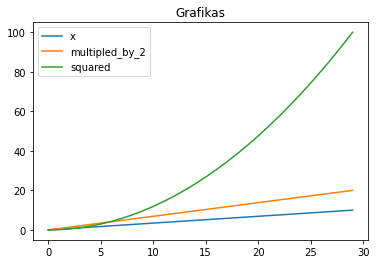

In [87]:
df.plot(title = 'Grafikas')

<AxesSubplot:title={'center':'Grafikas'}>

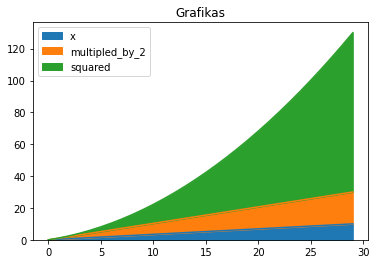

In [88]:
df.plot(title = 'Grafikas', kind = 'area')

<AxesSubplot:title={'center':'Grafikas'}>

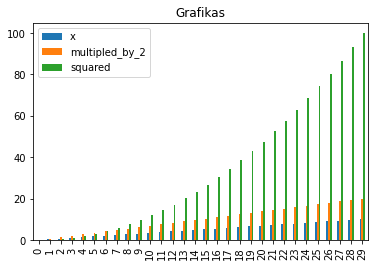

In [89]:
df.plot(title = 'Grafikas', kind = 'bar')

## Matplotlib

In [90]:
x

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

In [91]:
import matplotlib.pyplot as plt

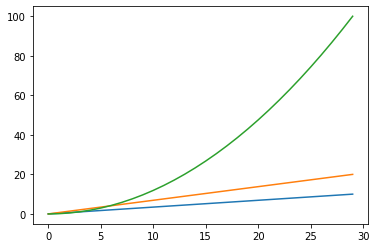

In [93]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

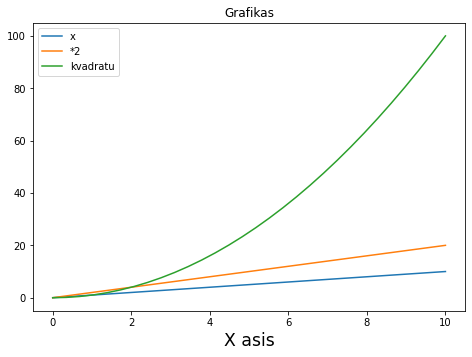

In [105]:
fig = plt.figure()
ax = fig.add_axes(rect = [0,0,1,1])

ax.plot(x,x, label = 'x')
ax.plot(x,y, label = '*2')
ax.plot(x,z, label = 'kvadratu')
ax.set_title('Grafikas')
ax.set_xlabel('X asis', fontsize = 'xx-large')
ax.legend()

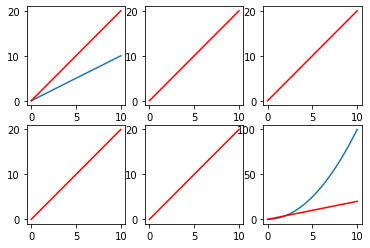

In [111]:
fig, axes = plt.subplots(2,3)

axes[1,2].plot(x,z)
axes[0,0].plot(x,x)

for row in axes:
    for col_ax in row:
        col_ax.plot(x,y,c='r')

(0.0, 7.0)

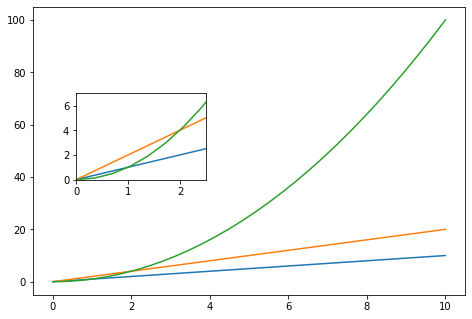

In [115]:
fig = plt.figure()
ax = fig.add_axes(rect = [0,0,1,1])
ax_zoom = fig.add_axes(rect=[0.1,0.4,0.3,0.3])

ax.plot(x,x, label = 'x')
ax.plot(x,y, label = '*2')
ax.plot(x,z, label = 'kvadratu')

ax_zoom.plot(x,x, label = 'x')
ax_zoom.plot(x,y, label = '*2')
ax_zoom.plot(x,z, label = 'kvadratu')
ax_zoom.set_xlim([0,2.5])
ax_zoom.set_ylim([0,7])